Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 9.1

## Part A. Average number of comparisons when searching

## Question 1. 

Complete the following function that computes the depth of a given node in a BST identified by its root:

In [154]:
class Node:
    #this function is important as it initializes thee object 
    #we create a tree with a certain node and no children
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        #this function inserts objects into a binary tree
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        #if the node is bigger than the key
        if self.data > node.data:
            #and there is no left child
            if self.l_child is None:
                #we insert they key as the left child
                self.l_child = node
                node.parent = self
            else:
                #or if there is a left child, we reiterate the previoussteps
                #this is kind of a recursive call
                self.l_child.insert(node)
        else:
            #here we proceed if the key is larger than the root
            #the operations are the same as in the previous case
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    #here we travel down the left child until there is no children
    #when we reach the leaf, we know it is the minimum value
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node     
    
    #here we return the value of the node we want to search
    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    
    def to_string(self): 
        print('self.data', self.data)
        root=self
        if not root: 
            return 'Nil'
        else: 
            r = root.r_child.to_string() if root.r_child else 'Nil'
            l = root.l_child.to_string() if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'
    
    #this function is called in the search_data function
    def search(self, value):
        node = self
        #the basic function, if we are searching for the root
        if node == None or value == node.data:
            return node
        #if we are searching for a node that is not a root
        #we will go down the left subtree if the value is smaller than the value of the root
        elif value < node.data:
            return node.l_child.search(value)
        else:
            #or down the right subtree if the value is bigger
            return node.r_child.search(value)
        
    #Taken from the pseudocode in the book
    def inorder(self):
        #if there is a root
        if self != None:
            #we go down the left subtree and print the values
            self.l_child.inorder()
            print(self.data)
            #and than the right one (printing the left children first)
            self.r_child.inorder()
    
    #this function is needed for the delete function 
    def transplant(self, u, v):
        node = self
        #if u's parent is none
        if u.parent == None:
            #we transplant v to be the root
            node = v
        #if u is the lft child
        elif u == u.parent.l_child:
            #then v becomes the left child
            u.parent.l_child = v
        else:
            #othervise v becomes the right child
            u.parent.r_child = v
        if v != None:
            #if v is an empty node
            #then the parent of u becomes the parent of v
            v.parent = u.parent
        return node
    
    def delete(self, value):
        #looking up the valuee wee want to delete
        x = self.search(value)
        #if x is not empy and doesn;t have a left child
        if x != None and x.l_child == None:
            #we transplant the right child on the x's place
            self = self.transplant(x, x.r_child)
        #if x is not empty and it doesn't have a right child
        elif x!= None and x.r_child == None:
            #we transplant the left child on the x's place
            self = self.transplant(x, x.l_child)
        else:
            #finding x's successor
            y = minimum(x.r_child)
            #if it's not x's parent
            if y.parent != x:
                #we transplant the right child of y to be the root
                self = self.transplant(y,y.r_child)
                #y'sright child becomes x's right child
                y.r_child = x.right
                #this line confuses me though = isn't y.r_child.parent just y
                y.r_child.parent = y
            self = self.transplant(x,y)
            y.l_child = x.l_child
            y.l_child.parent = y
        return self
    
    #HERE IS THE CODE FOR THE TASK
    def depth(self, node, lst): 
        #here I check whether the the node we are looking for is not the root node itself
        if self.data == node: 
            #if yes, than the depth is 0
            return 0
        else:
            #if the node is bigger than the root, then we recursively call on the right side
            if node > self.data:
                #and append 1 to the list we created to keep track of how many comparisons we make
                lst.append(1)
                self.r_child.depth(node,lst)
            else:
                #same for the left side, if the node is smaller than the root
                lst.append(1)
                self.l_child.depth(node,lst)
        #returning the depth of the tree 
        return sum(lst)-1


In [155]:
#TESTING
tree1 = Node(4)

lst = [2,4,6,1,7,9,3]
for i in lst:
    tree1.insert(Node(i))
    
tree1.depth(1,[])

1

In [156]:
def depth(root, node):
    """finds the depth of the node in a BST. depth of root is 0.

    Input:
    - root: a node, the root of the BST
    - node: a node to compute the depth of

    Output:
    - d: int, distance from node to root"""
    # YOUR CODE HERE
    raise NotImplementedError()

In [157]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2.

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [220]:
import random

#creating a list of values from 1 to 100
lst = list(range(1,101))
#settign a seed to be able to reproduce the result
random.seed(125)
#shuffling the list
random.shuffle(lst)

#creating a tree with the node which is the first element in the list
tree = Node(lst[0])
#insert the rest of the list into the BST
for i in range(1, len(lst)):
    tree.insert(Node(lst[i]))

#defining the function
def avg_cmp(bst, lst):
    #creating an empty list to store the numbers of comparisons
    comparisons = []
    #picking 100 random numbers from the list and appending the number of comparisons to the list
    for i in range(100):
        comparisons.append(tree.depth(random.choice(lst), [])+1)
    #returning the average number
    return (sum(comparisons)/len(comparisons))

avg_cmp(tree, lst)

TypeError: 'list' object cannot be interpreted as an integer

In [222]:
import random

#creating a list of values from 1 to 100
lst = [1,2,3,12,14]
#settign a seed to be able to reproduce the result


#creating a tree with the node which is the first element in the list
tree = Node(lst[0])
#insert the rest of the list into the BST
for i in range(1, len(lst)):
    tree.insert(Node(lst[i]))

#defining the function
def avg_cmp(bst, lst):
    #creating an empty list to store the numbers of comparisons
    comparisons = []
    #picking 100 random numbers from the list and appending the number of comparisons to the list
    for i in range(lst):
        comparisons.append(tree.depth(random.choice(lst), [])+1)
    #returning the average number
    return (sum(comparisons)/len(comparisons))

avg_cmp(tree, lst)

AttributeError: 'NoneType' object has no attribute 'depth'

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 
## Question 1. 

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [178]:
def max_depth(bst, lst):
    depths = []
    #iterating through each number that was added to the bst and checking their depth
    for i in lst:
        depths.append(tree.depth(i, []))
    #returning the biggest thep
    return max(depths)

max_depth(tree, lst)

11

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2. 

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [179]:
def avg_depth(bst, lst):
    #creating an empty list to store the numbers of depths
    depths = []
    #going through every number that was added to cbt and recording their depth
    for i in lst:
        depths.append(tree.depth(i, []))
    #returning the average depth
    return (sum(depths)/len(depths))

avg_depth(tree, lst)

5.28

In [143]:
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node

    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def search(self, value):
        """searches a *non-empty* tree rooted at the node for a node with data = value, 
        returns the node if found, None otherwise"""
        if value == self.data:
            return self
        if value < self.data:
            if self.l_child:
                return self.l_child.search(value)
            else:
                return None
        else:
            if self.r_child:
                return self.r_child.search(value)
            else:
                return None
    
    def delete(self, value):
        def transplant(node1, node2):
            """
            replaces the subtree rooted at node1 with the subtree rooted at node2
            """
            nonlocal root
            if node1.parent == None:
                root = node2
            elif node1 == node1.parent.l_child:
                node1.parent.l_child = node2
            else:
                node1.parent.r_child = node2
            if node2 != None:
                node2.parent = node1.parent

        """if a node with data = value is present in the tree rooted at Node, deletes that node and returns the root"""
        root = self
        node = root.search(value)
        if node:
            if node.l_child is None:
                transplant(node, node.r_child)
            elif node.r_child == None:
                transplant(node, node.l_child)
            else:
                y = node.r_child.minimum()
                if y.parent != node:
                    transplant(y, y.r_child)
                    y.r_child = node.r_child
                    y.r_child.parent = y
                transplant(node, y)
                y.l_child = node.l_child
                y.l_child.parent = y
        return root
    
    def inorder(self): 
        """returns a list of all data in the tree rooted at root produced using an in order traversal"""
        lst = []
        root = self
        def sub_inorder(root):
            if not root is None:
                sub_inorder(root.l_child)
                lst.append(root.data)
                sub_inorder(root.r_child)
        sub_inorder(root)
        return lst
    
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
def is_equal(a,b):
    return abs(a-b) < 1e-5

assert(avg_depth(nodes[0]) == 16/9)
assert(is_equal(avg_depth(nodes[1]),1.2))
assert(is_equal(avg_depth(nodes[2]), 2/3))
assert(is_equal(avg_depth(nodes[3]), 2/3))
assert(avg_depth(nodes[4]) == 0)
assert(avg_depth(nodes[5]) == 0)
assert(avg_depth(nodes[6]) == 0)
assert(avg_depth(nodes[7]) == 0)
assert(avg_depth(nodes[8]) == 0)

AssertionError: 

So I ran into a problem with this task because for my previous codes, I iterated through the values in the bst through the list from which I initially inserted the values. I understand that this is not the most efficient approach, but I really could not find how to iterate through or randomly choose from the values in the bst. How can I do that?

## Question 3.
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

In [166]:
lst = list(range(1,200))
#settign a seed to be able to reproduce the result
random.seed(125)
#shuffling the list
random.shuffle(lst)

#creating a tree with the node which is the first element in the list
tree = Node(lst[0])
#insert the rest of the list into the BST
for i in range(1, len(lst)):
    tree.insert(Node(lst[i]))
    
print(max_depth(tree))
print(avg_depth(tree))

12
5.889447236180905


As N increases, the average depth and the maximum depth increase because when we are adding the elements we are essentially creatting new levels in the tree. In the next task, I am expecting to get a logarithmic growth given that in the previous classes we discussed how height of the tree can be calculated using the formula logN. 


## Question 4.

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [204]:
average_depth = []
maximum_depth = []

for i in range(100, 10000, 100):
    lst = list(range(1,i))
    random.shuffle(lst)
    #creating a tree with the node which is the first element in the list
    tree = Node(lst[0])
    #insert the rest of the list into the BST
    for i in range(1, len(lst)):
        tree.insert(Node(lst[i]))
    average_depth.append(avg_depth(tree, lst))
    maximum_depth.append(max_depth(tree, lst))
    
print(len(average_depth))
print(len(maximum_depth))
    
    

99
99


In [207]:
import math
average_depth = []
maximum_depth = []

for i in range(200, 10000, 200):
    lst = list(range(1,i))
    random.shuffle(lst)
    #creating a tree with the node which is the first element in the list
    #insert the rest of the list into the BST
    test_list = []
    test_list_avg = []
    test_list_max = []
    for k in range(25):
        for m in range(math.ceil(i/2)):
            test_list.append(random.choice(lst))
        tree = Node(test_list[0])
        for l in range(1, len(test_list)):
            tree.insert(Node(test_list[l]))
        test_list_avg.append(avg_depth(tree, test_list))
        test_list_max.append(max_depth(tree, test_list))
    average_depth.append(sum(test_list_avg)/len(test_list_avg))
    maximum_depth.append(sum(test_list_max)/len(test_list_max))
    
print(len(average_depth))
print(len(maximum_depth))

49
49


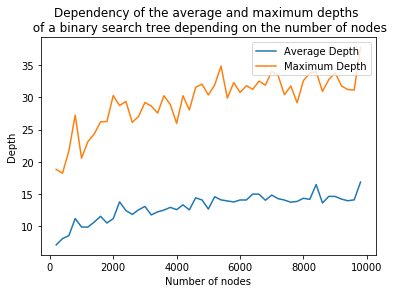

In [209]:
import matplotlib.pyplot as plt
#plotting the graph
x = list(range(200, 10000, 200))
plt.plot(x,average_depth,label = "Average Depth")
plt.plot(x,maximum_depth,label = "Maximum Depth")
plt.title("Dependency of the average and maximum depths \n of a binary search tree depending on the number of nodes")
plt.ylabel("Depth")
plt.xlabel("Number of nodes")
plt.legend(loc="upper right")
plt.show()

Yes, as we can see, the growth is actually logarithmical. Because of the random component, the produced tree is approximatelly balanced, so the height of the tree would be around logn.